### Author: Arjun Verma

In [2]:
import numpy as np
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import models
import matplotlib.pyplot as plt

In [16]:
dataset = tf.keras.preprocessing.image_dataset_from_directory("birds", shuffle=True, image_size=(224, 224), batch_size=32, color_mode="grayscale")

dataset

Found 4000 files belonging to 4 classes.


<_BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 1), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [17]:
class_names = dataset.class_names
class_names

['greypartridge', 'stockdove', 'turtledove', 'yellowhammer']

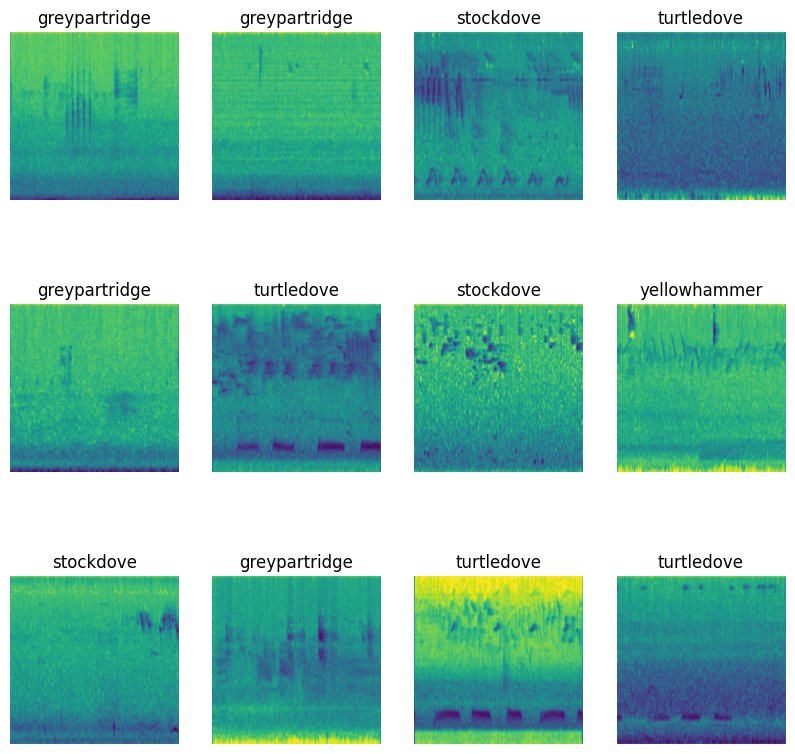

In [18]:
plt.figure(figsize=(10, 10))
for img_batch, label in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3, 4, i+1)
        plt.imshow(img_batch[i].numpy().astype("uint8"))
        plt.axis("off")
        plt.title(class_names[label[i]])

In [19]:
train_ds = dataset.take(int(len(dataset)*0.8))
remaining_data = dataset.skip(int(len(dataset)*0.8))

In [20]:
val_ds = remaining_data.take(int(len(remaining_data)*0.5))
test_ds = remaining_data.skip(int(len(remaining_data)*0.5))

In [21]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)

In [23]:
resize_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(224, 224),
    layers.experimental.preprocessing.Rescaling(1.0/223)
    ])

In [24]:
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical")
])

In [42]:
input_shape = dataset.element_spec[0].shape
print("Input shape:", input_shape)

Input shape: (None, 224, 224, 1)


In [28]:
input_shape = (32, 224, 224, 1)
n_classes = 4

model = models.Sequential([
    resize_rescale, 
    data_augmentation,
    layers.Conv2D(32, (3,3), activation="relu", input_shape = input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size = (3,3), activation= "relu"),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size = (3,3), activation= "relu"),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size = (3,3), activation= "relu"),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size = (3,3), activation= "relu"),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size = (3,3), activation= "relu"),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation="softmax")
])

model.build(input_shape = input_shape)

In [29]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (32, 224, 224, None)      0         
                                                                 
 sequential_2 (Sequential)   (32, 224, 224, None)      0         
                                                                 
 conv2d_12 (Conv2D)          (32, 222, 222, 32)        320       
                                                                 
 max_pooling2d_12 (MaxPoolin  (32, 111, 111, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (32, 109, 109, 64)        18496     
                                                                 
 max_pooling2d_13 (MaxPoolin  (32, 54, 54, 64)         0         
 g2D)                                                 

In [30]:
model.compile(
    optimizer = "adam", 
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), 
    metrics = ["accuracy"]
)

In [31]:
history = model.fit(
    train_ds,
    epochs = 50,
    batch_size = 32,
    verbose = 1,
    validation_data = val_ds
)

Epoch 1/50
100/100 [==============================] - 100s 897ms/step - loss: 1.5885 - accuracy: 0.2353 - val_loss: 1.4458 - val_accuracy: 0.2396
Epoch 2/50
100/100 [==============================] - 78s 778ms/step - loss: 1.4111 - accuracy: 0.2578 - val_loss: 1.4020 - val_accuracy: 0.2318
Epoch 3/50
100/100 [==============================] - 75s 744ms/step - loss: 1.4024 - accuracy: 0.2619 - val_loss: 1.3992 - val_accuracy: 0.2318
Epoch 4/50
100/100 [==============================] - 74s 739ms/step - loss: 1.3667 - accuracy: 0.3063 - val_loss: 1.3762 - val_accuracy: 0.3854
Epoch 5/50
100/100 [==============================] - 74s 741ms/step - loss: 1.0529 - accuracy: 0.5509 - val_loss: 0.9705 - val_accuracy: 0.5599
Epoch 6/50
100/100 [==============================] - 77s 768ms/step - loss: 0.7737 - accuracy: 0.6975 - val_loss: 0.7605 - val_accuracy: 0.7240
Epoch 7/50
100/100 [==============================] - 80s 800ms/step - loss: 0.6899 - accuracy: 0.7428 - val_loss: 0.7299 - val_a

In [32]:
scores = model.evaluate(test_ds)

13/13 [==============================] - 5s 197ms/step - loss: 0.6577 - accuracy: 0.8101


In [33]:
scores

[0.6576985716819763, 0.8100961446762085]

In [34]:
history

In [35]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [41]:
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]

loss = history.history["loss"]
val_loss = history.history["val_loss"]

[1.5884548425674438, 1.411112666130066, 1.4024008512496948, 1.366713285446167, 1.0529167652130127, 0.7737190127372742, 0.6899272799491882, 0.6611472964286804, 0.6216847896575928, 0.6004436612129211, 0.5641353726387024, 0.5506907105445862, 0.5303944945335388, 0.5030277371406555, 0.4815658628940582, 0.47505247592926025, 0.45920929312705994, 0.46714362502098083, 0.42596063017845154, 0.4398716688156128, 0.4321236312389374, 0.40829068422317505, 0.39837485551834106, 0.38817429542541504, 0.38982585072517395, 0.37729576230049133, 0.3481837511062622, 0.35976889729499817, 0.34750401973724365, 0.3189510703086853, 0.3278188407421112, 0.3018812835216522, 0.2975066304206848, 0.30827245116233826, 0.3016611933708191, 0.28920039534568787, 0.2930523157119751, 0.2674573063850403, 0.2651284337043762, 0.26629242300987244, 0.2526814341545105, 0.24730539321899414, 0.2509060502052307, 0.22514906525611877, 0.21624717116355896, 0.20358632504940033, 0.20844805240631104, 0.1967020034790039, 0.19939284026622772, 0

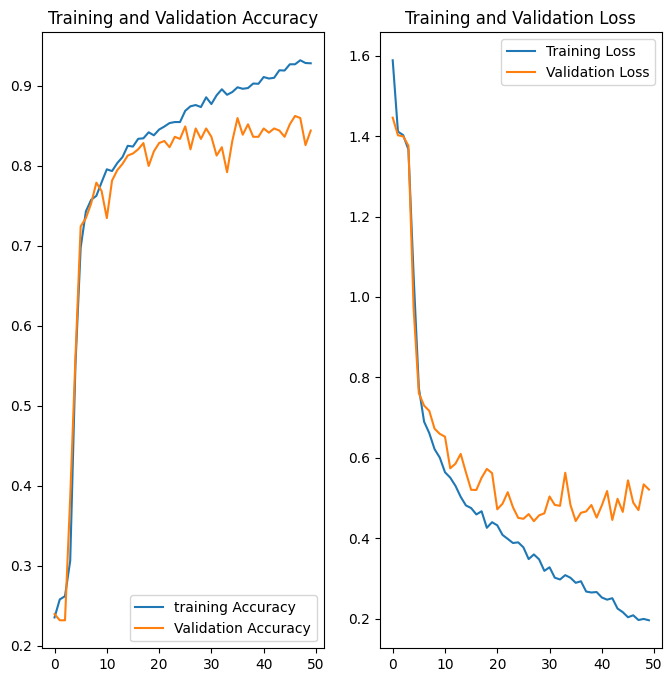

In [37]:
plt.figure(figsize=(8,8))
plt.subplot(1, 2, 1)
plt.plot(range(50), acc, label = "training Accuracy")
plt.plot(range(50), val_acc, label = "Validation Accuracy")
plt.legend(loc = "lower right")
plt.title("Training and Validation Accuracy")


plt.subplot(1, 2, 2)
plt.plot(range(50), loss, label = "Training Loss")
plt.plot(range(50), val_loss, label = "Validation Loss")
plt.legend(loc = "upper right")
plt.title("Training and Validation Loss")
plt.show()

first image to predict
actual label: turtledove
1/1 [==============================] - 0s 402ms/step
predicted label: 2


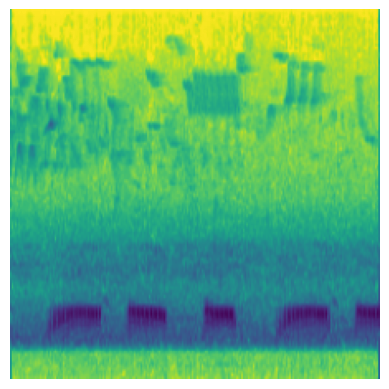

In [38]:
for images_batch, labels_batch in test_ds.take(1):
    
    first_image = images_batch[0].numpy().astype("uint8")
    first_label = labels_batch[0].numpy()

    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:", class_names[first_label])

    batch_prediction = model.predict(images_batch)
    print("predicted label:", np.argmax(batch_prediction[0]))

    plt.axis("off")

In [39]:
def predict(model, img):
    
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0) #create batch

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100* (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 [==============================] - 0s 56ms/step


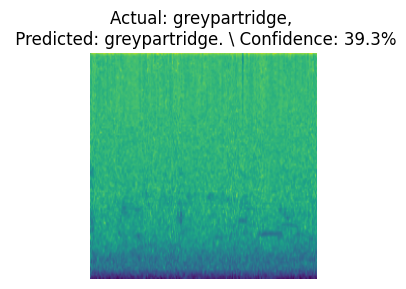

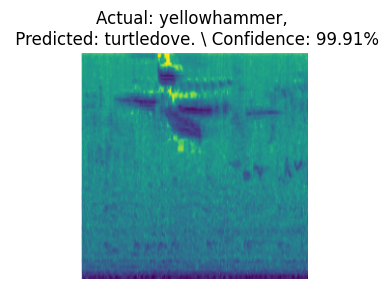

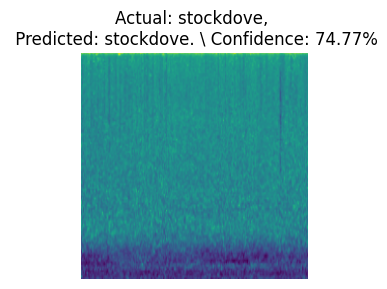

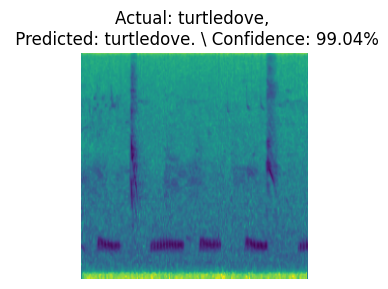

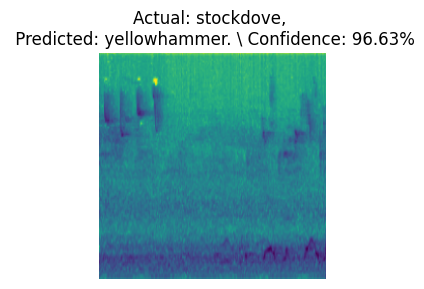

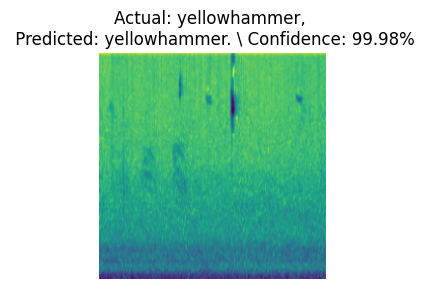

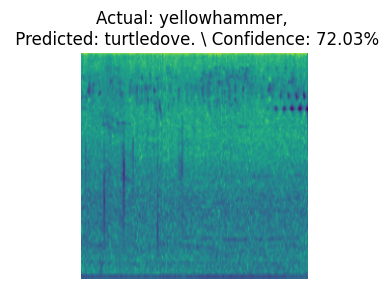

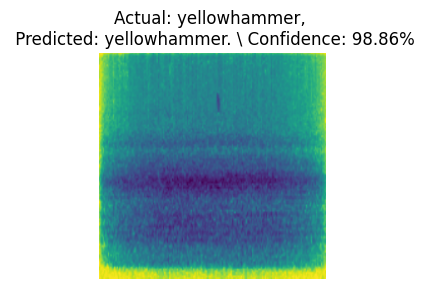

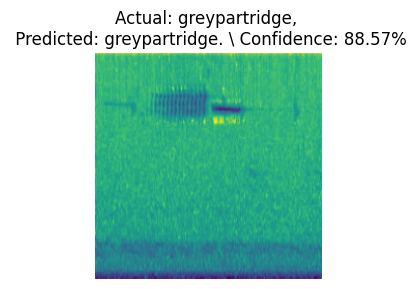

In [40]:
for images, labels in test_ds.take(1):
    
    for i in range(9):
        plt.figure(figsize=(10, 10))
        ax = plt.subplot(3, 3, i+1)
        plt.imshow(images[i].numpy().astype("uint8"))

        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]]

        plt.title(f"Actual: {actual_class}, \n Predicted: {predicted_class}. \ Confidence: {confidence}%")

        plt.axis("off")